In [2]:
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential,load_model
from keras.layers import Dense
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU, ReLU, Dropout
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator


import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
# hyperparameter
batch_size = 32
epochs = 40
class_img = ['Banh bot loc', 'Banh chung', 'Banh khot', 'Banh mi', 'Banh trang nuong','Bun bo Hue', 'Bun thit nuong',
            'Bun thit nuong', 'Chao long', 'Com tam', 'Xoi xeo']


load_dataset = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True)

train_loader=load_dataset.flow_from_directory('/kaggle/input/vn-food/Food/Train',target_size=(244,244), batch_size=128, class_mode='categorical')
valid_loader=load_dataset.flow_from_directory('/kaggle/input/vn-food/Food/Val',target_size=(244,244), batch_size=128, class_mode='categorical')

train_loader.class_indices

Found 332 images belonging to 10 classes.
Found 124 images belonging to 10 classes.


{'Banh bot loc': 0,
 'Banh chung': 1,
 'Banh khot': 2,
 'Banh mi': 3,
 'Banh trang nuong': 4,
 'Bun bo Hue': 5,
 'Bun thit nuong': 6,
 'Chao long': 7,
 'Com tam': 8,
 'Xoi xeo': 9}

In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3), padding = 'same', input_shape=(244,244,3), strides= (2,2)))
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(64, (3,3), strides=(1,1), padding='same'))
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(128, (3,3), strides=(1,1), padding='same'))
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
          

model.add(Flatten())
model.add(Dense(124, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 122, 122, 32)      896       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 122, 122, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 61, 61, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

In [9]:
sgd = SGD(lr = 0.0001, decay = 1e-4, momentum = 0.9, nesterov= True)
model.compile(loss= 'categorical_crossentropy', optimizer= Adam(), metrics = ['accuracy'])
train = model.fit(train_loader,validation_data=valid_loader, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/40
3/3 [==============================] - 13s 5s/step - loss: 2.4524 - accuracy: 0.0813 - val_loss: 2.2933 - val_accuracy: 0.1371
Epoch 2/40
3/3 [==============================] - 10s 4s/step - loss: 2.3231 - accuracy: 0.1265 - val_loss: 2.2725 - val_accuracy: 0.2097
Epoch 3/40
3/3 [==============================] - 10s 4s/step - loss: 2.2847 - accuracy: 0.1536 - val_loss: 2.2551 - val_accuracy: 0.1774
Epoch 4/40
3/3 [==============================] - 10s 3s/step - loss: 2.3011 - accuracy: 0.1627 - val_loss: 2.2677 - val_accuracy: 0.1452
Epoch 5/40
3/3 [==============================] - 10s 4s/step - loss: 2.2920 - accuracy: 0.1295 - val_loss: 2.2501 - val_accuracy: 0.1694
Epoch 6/40
3/3 [==============================] - 10s 3s/step - loss: 2.2230 - accuracy: 0.1807 - val_loss: 2.1903 - val_accuracy: 0.2258
Epoch 7/40
3/3 [==============================] - 10s 3s/step - loss: 2.1855 - accuracy: 0.1988 - val_loss: 2.1538 - val_accuracy: 0.1774
Epoch 8/40
3/3 [==================

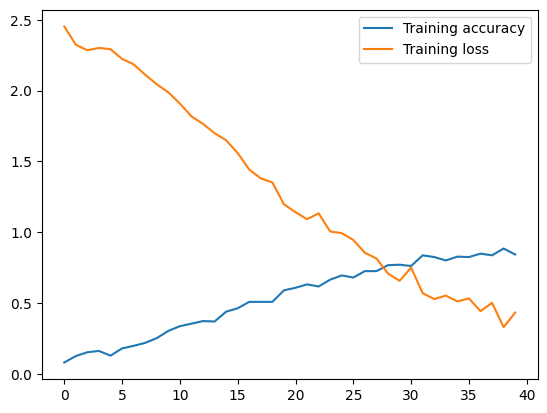

In [10]:
accuracy = train.history['accuracy']
loss = train.history['loss']
plt.plot(accuracy, label='Training accuracy')
plt.plot(loss, label='Training loss')
plt.legend()
plt.show()

In [12]:
# save model
model.save("Food.h5")

# Loade model
model_load=load_model('Food.h5')

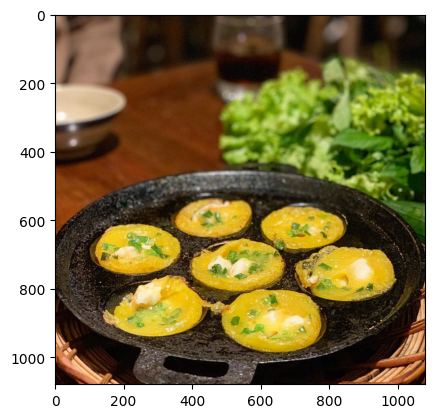

1/1 [==============================] - 0s 125ms/step
Banh khot


In [18]:
import PIL.Image as Image
from keras.utils import load_img, img_to_array


url = '/kaggle/input/vn-food/Food/Test/658.jpg'
# Load ảnh
img = Image.open(url)


# Hiển thị ảnh
plt.imshow(img)
plt.show()

img=load_img(url,target_size=(244,244))
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)

result=(model_load.predict(img).argmax())
print(class_img[result])